In [1]:
from billiard_functions import *
import numpy as np
from string import ascii_lowercase
from joblib import Parallel, delayed
import pandas as pd

## Billiards examples

### Square

In [32]:
def plot_boundary(params):
    L, r, xd, yd = params
    N = 1000
    dsL = L/N
    dsR = 2*np.pi*r/N
    dtheta = dsR/r
    x = np.zeros(5*N)
    y = np.zeros(5*N)
    i = np.arange(N)
    x[0:N] = i*dsL
    y[0:N] = 0.0

    x[N:2*N] = L
    y[N:2*N] = i*dsL

    x[2*N:3*N] = L - i*dsL
    y[2*N:3*N] = L

    x[3*N:4*N] = 0.0
    y[3*N:4*N] = L - i*dsL

    x[4*N:] = xd + r*np.cos(i*dtheta)
    y[4*N:] = yd + r*np.sin(i*dtheta)

    return x, y

def sinai_collision_point(x, y, mu, params):
    L, r, xd, yd = params
    pi = np.pi
    dte = np.zeros(5)
    xe = np.zeros(5)
    ye = np.zeros(5)
    phi = np.array([0.0, pi/2, pi, 3*np.pi/2, 0.0])
    mue = np.zeros(5)
    # Bottom wall
    if mu != 0 and mu != pi and mu != 2*pi:
        ye[0] = 0.0
        dte[0] = (ye[0] - y)/np.sin(mu)
        xe[0] = x + np.cos(mu)*dte[0]
        if xe[0] > 0 and xe[0] < L:
            pass
        else:
            dte[0] = -1
    # Right wall
    if mu != pi/2 and mu != 3*pi/2:
        xe[1] = L
        dte[1] = (xe[1] - x)/np.cos(mu)
        ye[1] = y + np.sin(mu)*dte[1]
        if ye[1] > 0 and ye[1] < L:
            pass
        else:
            dte[1] = -1
    # Top wall
    if mu != 0 and mu != pi and mu != 2*pi:
        ye[2] = L
        dte[2] = (ye[2] - y)/np.sin(mu)
        xe[2] = x + np.cos(mu)*dte[2]
        if xe[2] > 0 and xe[2] < L:
            pass
        else:
            dte[2] = -1
    # Left wall
    if mu != pi/2 and mu != 3*pi/2:
        xe[3] = 0.0
        dte[3] = (xe[3] - x)/np.cos(mu)
        ye[3] = y + np.sin(mu)*dte[3]
        if ye[3] > 0 and ye[3] < L:
            pass
        else:
            dte[3] = -1
    mue[:4] = (-mu + 2*phi[:4]) % (2*pi)
    # Disc
    b = 2*((x - xd)*np.cos(mu) + (y - yd)*np.sin(mu))
    c = (x - xd)**2 + (y - yd)**2 - r**2
    delta = b**2 - 4*c
    if delta > 0:
        dte[4] = (-b - np.sqrt(delta))/2
        xe[4] = x + np.cos(mu)
        ye[4] = y + np.sin(mu)
        theta = np.arctan2((ye[4] - yd), (xe[4] - xd)) % (2*pi)
        xl = -r*np.sin(theta)
        yl = r*np.cos(theta)
        phi[4] = np.arctan2(yl, xl) % (2*pi)
        alpha = (phi[4] - mu) % (pi)
        mue[4] = (alpha + phi[4]) % (2*pi)
    
    dtmin = min(i for i in dte if i > 0)
    im = np.where(dte == dtmin)[0][0]

    return xe[im], ye[im], mue[im]

In [33]:
L = 1.0
r = 0.25
xd = 0.5
yd = 0.5
params = np.array([L, r, xd, yd])
N = 3
u = np.zeros((N + 1, 2))
s = L/2
x = s
y = 0.0
phi = 0
alpha0 = np.pi/2.3
mu = (alpha0 + phi) % (2*np.pi)

for i in range(1, N + 1):
    x, y, mu = sinai_collision_point(x, y, mu, params)
    theta = np.arctan2(y, x)
    u[i, 0] = x
    u[i, 1] = y

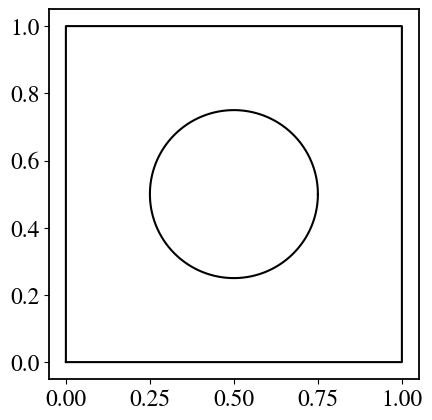

In [24]:
plot_params()
xb, yb = plot_boundary(params)
N = int(len(xb)/5)
plt.plot(xb[:4*N], yb[:4*N], "k")
plt.plot(xb[4*N:], yb[4*N:], "k")
plt.gca().set_aspect('equal')

## Billiard geometry

<Figure size 640x480 with 0 Axes>

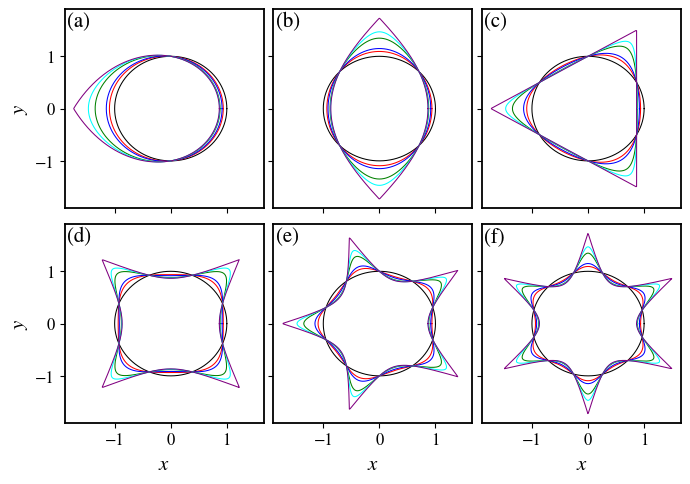

In [38]:
theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
gamma = [1, 2, 3, 4, 5, 6]
eps = [0.0, 0.15, 0.3, 0.75, 0.9, 0.99999]
colors = ["black", "red", "blue", "green", "cyan", "purple"]
xbox = 0.012
ybox = 0.916
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
plot_params(fontsize=15, tick_labelsize=12)
lw = 0.75
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(7, 5))
for i,g in enumerate(gamma):
    for j, e in enumerate(eps):
        radius = R(g, e, theta)
        x = radius*np.cos(theta)
        y = radius*np.sin(theta)
        if i == 2:
            leg = ax[int(i / 3), i % 3].plot(x, y, label="$\\epsilon = %g$" % e, lw=lw, c=colors[j])
        else:
            ax[int(i / 3), i % 3].plot(x, y, lw=lw, c=colors[j])
        ax[int(i / 3), i % 3].set_box_aspect(1)
        ax[int(i / 3), i % 3].text(xbox, ybox, '(%s)' % ascii_lowercase[i], transform=ax[int(i / 3), i % 3].transAxes, bbox=bbox)
#ax[0, 2].legend(bbox_to_anchor=(1.04, 1), loc="upper left", frameon=False)
ax[0, 0].set_ylabel("$y$")
ax[1, 0].set_ylabel("$y$")
ax[1, 0].set_xlabel("$x$")
ax[1, 1].set_xlabel("$x$")
ax[1, 2].set_xlabel("$x$")
plt.subplots_adjust(left=0.1, bottom=0.12, right=0.98, top=0.98, hspace=0.0, wspace=0.05)
plt.savefig("Figures/billiard_geometries.png", dpi=500)

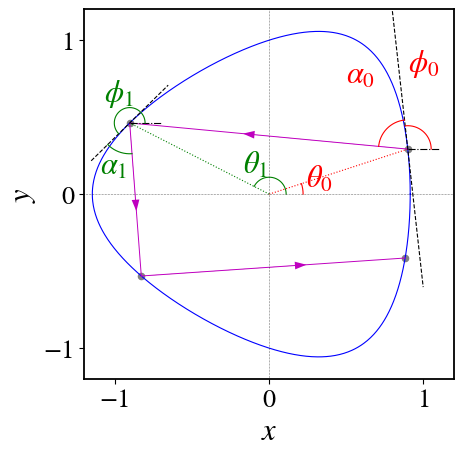

In [191]:
plot_params(fontsize=22, tick_labelsize=19)
plt.gca().set_aspect('equal', adjustable='box')

gamma = 3
eps = 0.3
Rmax = R(gamma, eps, np.pi/gamma)
N = 1000
theta = np.linspace(0, 2*np.pi, N)

x = R(gamma, eps, theta)*np.cos(theta)
y = R(gamma, eps, theta)*np.sin(theta)

plt.plot(x, y, 'b-', linewidth=0.8)

"""Rmax = R(gamma, eps, np.pi/gamma)
x = Rmax*np.cos(theta)
y = Rmax*np.sin(theta)
plt.plot(x, y, 'k-', linewidth=0.8)"""

# Plota as letras theta, phi e alpha
plt.text(0.24,0.045,'$\\theta_0$', c='r')
plt.text(0.9, 0.8, '$\\phi_0$', c='r')
plt.text(0.5, 0.72, '$\\alpha_0$', c='r')
plt.text(-0.17,0.135,'$\\theta_1$', c='g')
plt.text(-1.075, 0.6, '$\\phi_1$', c='g')
plt.text(-1.1, 0.13, '$\\alpha_1$', c='g')
#plt.text(0.9, 0.12, '$s$')
# Plota os pontos antes e depois da colisão
theta0 = np.pi/10
alpha0 = np.pi/2.3
ts = time_series(theta0, alpha0, gamma, eps, 3)
ps = phase_space(theta0, alpha0, gamma, eps, 3)
x0 = ts[0, 0]
y0 = ts[0, 1]
R0 = R(gamma, eps, theta0)
Rl = dRdtheta(R0, gamma, eps, theta0)
xl = Rl*np.cos(theta0) - y0
yl = Rl*np.sin(theta0) + x0
phi0 = np.arctan2(yl, xl) % (2*np.pi)
mu = (alpha0 + phi0) % (2*np.pi)
dx0 = np.cos(mu) #-0.2
dy0 = np.sin(mu) #-0.02
#########
x1 = ts[1, 0]
y1 = ts[1, 1]
theta1 = np.arctan2(y1, x1)
alpha1 = ps[1, 1]
R1 = R(gamma, eps, theta1)
Rl = dRdtheta(R1, gamma, eps, theta1)
xl = Rl*np.cos(theta1) - y1
yl = Rl*np.sin(theta1) + x1
phi1 = np.arctan2(yl, xl) % (2*np.pi)
mu = (alpha1 + phi1) % (2*np.pi)
dx1 = np.cos(mu)/2 #-0.2
dy1 = np.sin(mu)/2 #-0.02
##################
x2 = ts[2, 0]
y2 = ts[2, 1]
theta2 = np.arctan2(y2, x2)
alpha2 = ps[2, 1]
R2 = R(gamma, eps, theta2)
Rl = dRdtheta(R2, gamma, eps, theta2)
xl = Rl*np.cos(theta2) - y2
yl = Rl*np.sin(theta2) + x2
phi2 = np.arctan2(yl, xl) % (2*np.pi)
mu = (alpha2 + phi2) % (2*np.pi)
dx2 = np.cos(mu) #-0.2
dy2 = np.sin(mu) #-0.02
x3 = ts[3, 0]
y3 = ts[3, 1]

plt.scatter(x0, y0, s=20,c='grey')
plt.scatter(x1, y1, s=20,c='grey')
plt.scatter(x2, y2, s=20,c='grey')
plt.scatter(x3, y3, s=20,c='grey')
# Plota a linha do ângulo inicial
plt.plot([0, x0], [0, y0], 'r:', linewidth=0.8)
plt.plot([0, x1], [0, y1], 'g:', linewidth=0.8)
# Plota a reta que liga os pontos antes e depois da colisão
plt.plot([x0, x1], [y0, y1], 'm', linewidth=0.7)
plt.arrow(x0, y0, dx0, dy0, shape='full', lw=0, length_includes_head=False, head_width=.05, color='m')
plt.plot([x1, x2], [y1, y2], 'm', linewidth=0.7)
plt.arrow(x1, y1, dx1, dy1, shape='full', lw=0, length_includes_head=False, head_width=.05, color='m')
plt.plot([x2, x3], [y2, y3], 'm', linewidth=0.7)
plt.arrow(x2, y2, dx2, dy2, shape='full', lw=0, length_includes_head=False, head_width=.05, color='m')
# Plota o semi círculo indicando o ângulo inicial
theta = np.linspace(0, theta0, 1000)
xc = 0.22*np.cos(theta)
yc = 0.22*np.sin(theta)
plt.plot(xc, yc, 'r', linewidth=0.8)
# Plota o semi círculo indicando o ângulo final
theta = np.linspace(0, theta1, 1000)
xc = 0.11*np.cos(theta)
yc = 0.11*np.sin(theta)
plt.plot(xc, yc, 'g', linewidth=0.8)

# Plota a reta tangente ao ponto de lançamento
A = np.tan(phi0)
B = y0 - A*x0
xt = np.linspace(x0 - 0.1, x0 + 0.1, 100)
yt = A*xt + B
plt.plot(xt, yt, 'k--', linewidth=0.8)
# Plota a reta tangente ao ponto de colisão
A = np.tan(phi1)
B = y1 - A*x1
xt = np.linspace(x1 - 0.25, x1 + 0.25, 100)
yt = A*xt + B
plt.plot(xt, yt, 'k--', linewidth=0.8)


# Plota a reta horizontal que mede o ângulo phi
plt.plot([x0, 1.1], [y0,y0], 'k-.', linewidth=0.8)
plt.plot([x1, -0.7], [y1, y1], 'k-.', linewidth=0.8)
# Plota o arco indicando os ângulos phi0 e alpha0
theta = np.linspace(0, phi0, 1000)
xc = x0 + 0.152*np.cos(theta)
yc = y0 + 0.152*np.sin(theta)
plt.plot(xc, yc, 'r', linewidth=0.8)
theta = np.linspace(phi0, phi0 + alpha0, 1000)
xc = x0 + 0.19*np.cos(theta)
yc = y0 + 0.19*np.sin(theta)
plt.plot(xc, yc, 'r', linewidth=0.8)
# Plota o arco indicando os ângulos phi1 e alpha1
theta = np.linspace(0, phi1, 1000)
xc = x1 + 0.1*np.cos(theta)
yc = y1 + 0.1*np.sin(theta)
plt.plot(xc, yc, 'g', linewidth=0.8)
theta = np.linspace(phi1, phi1 + alpha1, 1000)
xc = x1 + 0.2*np.cos(theta)
yc = y1 + 0.2*np.sin(theta)
plt.plot(xc, yc, 'g', linewidth=0.8)
plt.yticks([-1, 0, 1])
plt.xticks([-1, 0, 1])
xmin = -1.2
xmax = 1.2
ymin = -1.2
ymax = 1.2
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("$x$")
plt.ylabel("$y$")
#plt.legend(loc='upper center', ncol=2, fancybox=True, shadow=True)#, bbox_to_anchor=(0.5, 1.35))
#plt.tight_layout()
plt.plot([0, 0],[ymin, ymax], 'k:', linewidth=0.4)
plt.plot([xmin, xmax], [0,0], 'k:', linewidth=0.4)
plt.savefig("Figures/angles.png", dpi=600, bbox_inches='tight', pad_inches=0.05)
#plt.show()

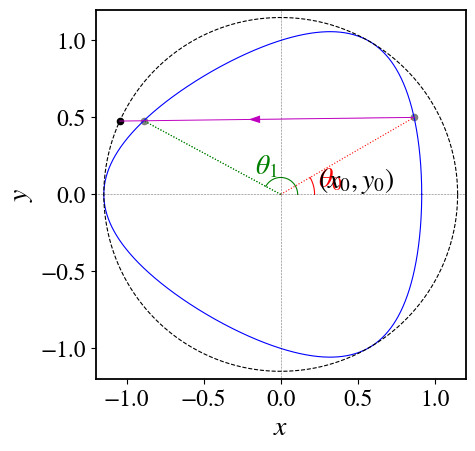

In [186]:
plot_params()
plt.gca().set_aspect('equal', adjustable='box')

gamma = 3
eps = 0.3
Rmax = R(gamma, eps, np.pi/gamma)
N = 1000
theta = np.linspace(0, 2*np.pi, N)

x = R(gamma, eps, theta)*np.cos(theta)
y = R(gamma, eps, theta)*np.sin(theta)

plt.plot(x, y, 'b-', linewidth=0.8)

Rmax = R(gamma, eps, np.pi/gamma)
x = Rmax*np.cos(theta)
y = Rmax*np.sin(theta)
plt.plot(x, y, 'k--', linewidth=0.8)

# Plota as letras theta, phi e alpha
plt.text(0.24,0.045,'$\\theta_0$', c='r')
plt.text(-0.17,0.135,'$\\theta_1$', c='g')
#plt.text(0.9, 0.12, '$s$')
# Plota os pontos antes e depois da colisão
theta0 = np.pi/6
alpha0 = np.pi/2.3
ts = time_series(theta0, alpha0, gamma, eps, 3)
ps = phase_space(theta0, alpha0, gamma, eps, 3)
x0 = ts[0, 0]
y0 = ts[0, 1]
R0 = R(gamma, eps, theta0)
Rl = dRdtheta(R0, gamma, eps, theta0)
xl = Rl*np.cos(theta0) - y0
yl = Rl*np.sin(theta0) + x0
phi0 = np.arctan2(yl, xl) % (2*np.pi)
mu = (alpha0 + phi0) % (2*np.pi)
dx0 = np.cos(mu) #-0.2
dy0 = np.sin(mu) #-0.02
#########
x1 = ts[1, 0]
y1 = ts[1, 1]
#########
b = 2*(x0*np.cos(mu) + y0*np.sin(mu))
c = x0**2 + y0**2 - Rmax**2
dte = (-b + np.sqrt(b**2 - 4*c))/2
xe = x0 + np.cos(mu)*dte
ye = y0 + np.sin(mu)*dte
thetae = np.arctan2(ye, xe)

plt.scatter(x0, y0, s=20,c='grey')
plt.scatter(x1, y1, s=20,c='grey')
plt.scatter(xe, ye, s=20,c='k')
# Plota a linha do ângulo inicial
plt.plot([0, x0], [0, y0], 'r:', linewidth=0.8)
plt.plot([0, x1], [0, y1], 'g:', linewidth=0.8)
plt.plot([0, x1], [0, y1], 'g:', linewidth=0.8)
# Plota a reta que liga os pontos antes e depois da colisão
plt.plot([x0, xe], [y0, ye], 'm', linewidth=0.7)
plt.arrow(x0, y0, dx0, dy0, shape='full', lw=0, length_includes_head=False, head_width=.05, color='m')
# Plota o semi círculo indicando o ângulo inicial
theta = np.linspace(0, theta0, 1000)
xc = 0.22*np.cos(theta)
yc = 0.22*np.sin(theta)
plt.plot(xc, yc, 'r', linewidth=0.8)
# Plota o semi círculo indicando o ângulo final
theta = np.linspace(0, theta1, 1000)
xc = 0.11*np.cos(theta)
yc = 0.11*np.sin(theta)
plt.plot(xc, yc, 'g', linewidth=0.8)

plt.text(0.24,0.045,'$(x_0, y_0)$', c='k')

xmin = -1.2
xmax = 1.2
ymin = -1.2
ymax = 1.2
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("$x$")
plt.ylabel("$y$")
#plt.legend(loc='upper center', ncol=2, fancybox=True, shadow=True)#, bbox_to_anchor=(0.5, 1.35))
#plt.tight_layout()
plt.plot([0, 0],[ymin, ymax], 'k:', linewidth=0.4)
plt.plot([xmin, xmax], [0,0], 'k:', linewidth=0.4)
plt.savefig("Figures/billiard_new_coll.png", dpi=600, bbox_inches='tight', pad_inches=0.05)

<Figure size 640x480 with 0 Axes>

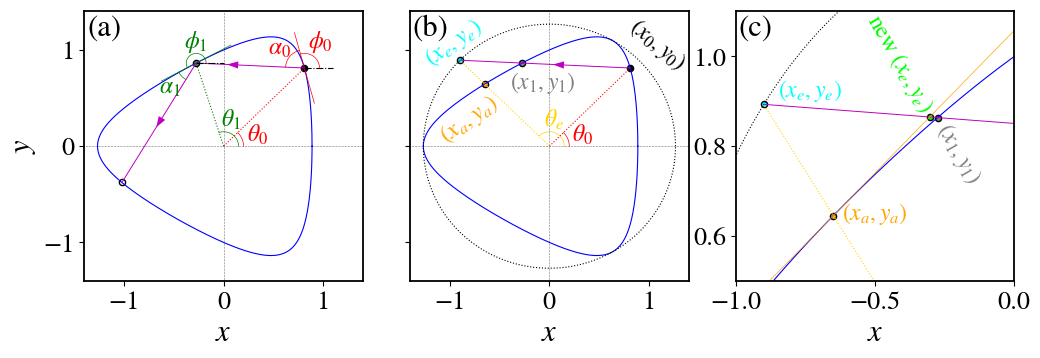

In [209]:
plot_params(fontsize=22, tick_labelsize=19)
fig, ax = plt.subplots(1, 3, figsize=(12, 3.5))
xbox = 0.01
ybox = 0.91
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
#ax[0].set_aspect('equal', adjustable='box')
fs = 17
gamma = 3
eps = 0.6
xmin = -1.4
xmax = 1.4
ymin = -1.4
ymax = 1.4
Rmax = R(gamma, eps, np.pi/gamma)
N = 1000
theta = np.linspace(0, 2*np.pi, N)

x = R(gamma, eps, theta)*np.cos(theta)
y = R(gamma, eps, theta)*np.sin(theta)
ax[0].plot(x, y, 'b-', linewidth=0.8)
ax[1].plot(x, y, 'b-', linewidth=0.8)
ax[2].plot(x, y, 'b-', linewidth=0.8)
Rmax = R(gamma, eps, np.pi/gamma)
x = Rmax*np.cos(theta)
y = Rmax*np.sin(theta)
ax[1].plot(x, y, 'k:', linewidth=0.8)
ax[2].plot(x, y, 'k:', linewidth=0.8)

theta0 = np.pi/4
alpha0 = np.pi/2.5
ts = time_series(theta0, alpha0, gamma, eps, 3)
ps = phase_space(theta0, alpha0, gamma, eps, 3)
x0 = ts[0, 0]
y0 = ts[0, 1]
R0 = R(gamma, eps, theta0)
Rl = dRdtheta(R0, gamma, eps, theta0)
xl = Rl*np.cos(theta0) - y0
yl = Rl*np.sin(theta0) + x0
phi0 = np.arctan2(yl, xl) % (2*np.pi)
mu0 = (alpha0 + phi0) % (2*np.pi)
dx0 = np.cos(mu0)/1.5 #-0.2
dy0 = np.sin(mu0)/1.5 #-0.02
b = 2*(x0*np.cos(mu0) + y0*np.sin(mu0))
c = x0**2 + y0**2 - Rmax**2
dte = (-b + np.sqrt(b**2 - 4*c))/2
xe = x0 + np.cos(mu0)*dte
ye = y0 + np.sin(mu0)*dte
thetae = np.arctan2(ye, xe)
xa = R(gamma, eps, thetae)*np.cos(thetae)
ya = R(gamma, eps, thetae)*np.sin(thetae)
Ra = R(gamma, eps, thetae)
Rla = dRdtheta(Ra, gamma, eps, thetae)
xla = Rla*np.cos(thetae) - ya
yla = Rla*np.sin(thetae) + xa
dte = (ya - y0 + (yla/xla)*(x0 - xa))/(np.sin(mu0) - (yla/xla)*np.cos(mu0))
xe_new = x0 + np.cos(mu0)*dte
ye_new = y0 + np.sin(mu0)*dte
#########
x1 = ts[1, 0]
y1 = ts[1, 1]
theta1 = np.arctan2(y1, x1)
alpha1 = ps[1, 1]
R1 = R(gamma, eps, theta1)
Rl = dRdtheta(R1, gamma, eps, theta1)
xl = Rl*np.cos(theta1) - y1
yl = Rl*np.sin(theta1) + x1
phi1 = np.arctan2(yl, xl) % (2*np.pi)
mu1 = (alpha1 + phi1) % (2*np.pi)
dx1 = np.cos(mu1)/1.5 #-0.2
dy1 = np.sin(mu1)/1.5 #-0.02
##################
x2 = ts[2, 0]
y2 = ts[2, 1]
theta2 = np.arctan2(y2, x2)
alpha2 = ps[2, 1]
R2 = R(gamma, eps, theta2)
Rl = dRdtheta(R2, gamma, eps, theta2)
xl = Rl*np.cos(theta2) - y2
yl = Rl*np.sin(theta2) + x2
phi2 = np.arctan2(yl, xl) % (2*np.pi)
mu2 = (alpha2 + phi2) % (2*np.pi)
dx2 = np.cos(mu2) #-0.2
dy2 = np.sin(mu2) #-0.02
x3 = ts[3, 0]
y3 = ts[3, 1]

# Plota as letras theta, phi e alpha
ax[0].text(0.23,0.045,'$\\theta_0$', c='r', fontsize=fs)
ax[1].text(0.23,0.045,'$\\theta_0$', c='r', fontsize=fs)
ax[0].text(0.85, 1.025, '$\\phi_0$', c='r', fontsize=fs)
ax[0].text(0.45, 0.95, '$\\alpha_0$', c='r', fontsize=fs)
ax[0].text(-0.025,0.2,'$\\theta_1$', c='g', fontsize=fs)
ax[1].text(-0.05,0.2,'$\\theta_e$', c='gold', fontsize=fs)
ax[0].text(-0.4, 1.02, '$\\phi_1$', c='g', fontsize=fs)
ax[0].text(-0.65, 0.55, '$\\alpha_1$', c='g', fontsize=fs)
# Plota o semi círculo indicando o ângulo inicial
theta = np.linspace(0, theta0, 1000)
xc = 0.2*np.cos(theta)
yc = 0.2*np.sin(theta)
ax[0].plot(xc, yc, 'r', linewidth=0.5)
ax[1].plot(xc, yc, 'r', linewidth=0.5)
# Plota o semi círculo indicando o ângulo final
theta = np.linspace(0, theta1, 1000)
xc = 0.15*np.cos(theta)
yc = 0.15*np.sin(theta)
ax[0].plot(xc, yc, 'g', linewidth=0.5)
# Plota o semi círculo indicando o ângulo externo
theta = np.linspace(0, thetae, 1000)
xc = 0.15*np.cos(theta)
yc = 0.15*np.sin(theta)
ax[1].plot(xc, yc, 'gold', linewidth=0.5)
# Plota a linha do ângulo inicial
ax[0].plot([0, x0], [0, y0], 'r:', linewidth=0.8)
ax[0].plot([0, x1], [0, y1], 'g:', linewidth=0.8)
ax[1].plot([0, x0], [0, y0], 'r:', linewidth=0.8)
ax[1].plot([0, xe], [0, ye], ':', color="gold", linewidth=0.8)
ax[2].plot([0, xe], [0, ye], ':', color="gold", linewidth=0.8)
#plt.text(0.9, 0.12, '$s$')
# Plota os pontos antes e depois da colisão



ax[0].scatter(x0, y0, s=20, c='k', edgecolor='k')
ax[0].scatter(x1, y1, s=20,c='grey', edgecolor='k')
ax[0].scatter(x2, y2, s=20,c='white', edgecolor='k')
ax[1].scatter(x0, y0, s=20,c='k', edgecolor='k')
ax[1].scatter(x1, y1, s=20,c='grey', edgecolor='k')
ax[1].scatter(xe, ye, s=20,c='cyan', edgecolor='k')
ax[2].scatter(x1, y1, s=20,c='grey', edgecolor='k')
ax[2].scatter(xe, ye, s=20,c='cyan', edgecolor='k')
ax[1].scatter(xa, ya, s=20,c='orange', edgecolor='k')
ax[2].scatter(xa, ya, s=20,c='orange', edgecolor='k')
ax[2].scatter(xe_new, ye_new, s=20,c='lime', edgecolor='k')
# Plota a reta que liga os pontos antes e depois da colisão
ax[0].plot([x0, x1], [y0, y1], 'm', linewidth=0.7)
ax[0].arrow(x0, y0, dx0, dy0, shape='full', lw=0, length_includes_head=False, head_width=.075, color='m')
ax[1].plot([x0, xe], [y0, ye], 'm', linewidth=0.7)
ax[2].plot([x0, xe], [y0, ye], 'm', linewidth=0.7)
ax[1].arrow(x0, y0, dx0, dy0, shape='full', lw=0, length_includes_head=False, head_width=.075, color='m')
ax[0].plot([x1, x2], [y1, y2], 'm', linewidth=0.7)
ax[0].arrow(x1, y1, dx1, dy1, shape='full', lw=0, length_includes_head=False, head_width=.075, color='m')



# Plota a reta tangente ao ponto de lançamento
A = np.tan(phi0)
B = y0 - A*x0
xt = np.linspace(x0 - 0.1, x0 + 0.1, 100)
yt = A*xt + B
ax[0].plot(xt, yt, 'r-', linewidth=0.5)
# Plota a reta tangente ao ponto de colisão
A = np.tan(phi1)
B = y1 - A*x1
xt = np.linspace(x1 - 0.35, x1 + 0.35, 100)
yt = A*xt + B
ax[0].plot(xt, yt, 'g-', linewidth=0.5)


# Plota a reta horizontal que mede o ângulo phi
ax[0].plot([x0, 1.1], [y0,y0], 'k-.', linewidth=0.8)
ax[0].plot([x1, 0], [y1, y1], 'k-.', linewidth=0.8)
# Plota o arco indicando os ângulos phi0 e alpha0
theta = np.linspace(0, phi0, 1000)
xc = x0 + 0.152*np.cos(theta)
yc = y0 + 0.152*np.sin(theta)
ax[0].plot(xc, yc, 'r', linewidth=0.5)
theta = np.linspace(phi0, phi0 + alpha0, 1000)
xc = x0 + 0.19*np.cos(theta)
yc = y0 + 0.19*np.sin(theta)
ax[0].plot(xc, yc, 'r', linewidth=0.5)
# Plota o arco indicando os ângulos phi1 e alpha1
theta = np.linspace(0, phi1, 1000)
xc = x1 + 0.1*np.cos(theta)
yc = y1 + 0.1*np.sin(theta)
ax[0].plot(xc, yc, 'g', linewidth=0.5)
theta = np.linspace(phi1, phi1 + alpha1, 1000)
xc = x1 + 0.2*np.cos(theta)
yc = y1 + 0.2*np.sin(theta)
ax[0].plot(xc, yc, 'g', linewidth=0.5)


ax[0].set_yticks([-1, 0, 1])
ax[0].set_xticks([-1, 0, 1])
ax[0].set_xlim(xmin, xmax)
ax[0].set_ylim(ymin, ymax)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].plot([0, 0],[ymin, ymax], 'k:', linewidth=0.4)
ax[0].plot([xmin, xmax], [0,0], 'k:', linewidth=0.4)

#####################




ax[1].text(0.75,0.8,'$(x_0, y_0)$', c='k', fontsize=fs, rotation=-40)

ax[1].text(-0.4,0.6,'$(x_1, y_1)$', c='grey', fontsize=fs, rotation=0)
ax[2].text(-0.3,0.72,'$(x_1, y_1)$', c='grey', fontsize=fs, rotation=-60)

ax[1].text(-1.3,0.85,'$(x_e, y_e)$', c='cyan', fontsize=fs, rotation=35)
ax[2].text(-0.85,0.91,'$(x_e, y_e)$', c='cyan', fontsize=fs, rotation=0)

ax[1].text(-1.15,0.05,'$(x_a, y_a)$', c='orange', fontsize=fs, rotation=35)
ax[2].text(-0.62,0.635,'$(x_a, y_a)$', c='orange', fontsize=fs, rotation=0)

ax[2].text(-0.55,0.88,'new $(x_e, y_e)$', c='lime', fontsize=fs, rotation=-60)

for i in range(3):
    ax[i].text(xbox, ybox, '(%s)' % ascii_lowercase[i], transform=ax[i].transAxes, bbox=bbox)

x = np.linspace(-1, 0, 100)
y = ya + (yla/xla)*(x - xa)
ax[2].plot(x, y, "-", color='orange', lw=0.5)


ax[1].set_yticks([-1, 0, 1])
ax[1].set_yticklabels([])
ax[1].set_xlim(xmin, xmax)
ax[1].set_ylim(ymin, ymax)
ax[1].set_xlabel("$x$")
ax[2].set_xlim(-1., -0.)
ax[2].set_ylim(0.5, 1.1)
ax[2].set_xlabel("$x$")
#plt.legend(loc='upper center', ncol=2, fancybox=True, shadow=True)#, bbox_to_anchor=(0.5, 1.35))
#plt.tight_layout()
ax[1].plot([0, 0],[ymin, ymax], 'k:', linewidth=0.4)
ax[1].plot([xmin, xmax], [0,0], 'k:', linewidth=0.4)
plt.subplots_adjust(wspace=0.17)
plt.savefig("Figures/angles.png", dpi=600, bbox_inches='tight', pad_inches=0.05)
#plt.show()

<Figure size 640x480 with 0 Axes>

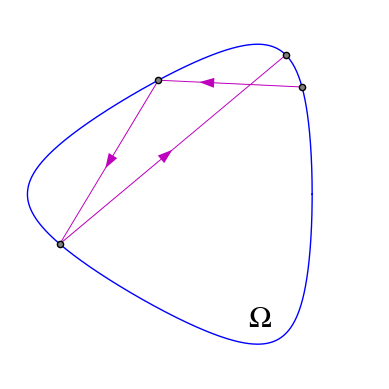

In [58]:
plot_params(fontsize=22, tick_labelsize=19)
fig, ax = plt.subplots()
xbox = 0.01
ybox = 0.91
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
plt.gca().set_aspect('equal', adjustable='box')
#plt.aspect('equal', adjustable='box')
fs = 17
gamma = 3
eps = 0.6
xmin = -1.4
xmax = 1.4
ymin = -1.4
ymax = 1.4
Rmax = R(gamma, eps, np.pi/gamma)
N = 1000
theta = np.linspace(0, 2*np.pi, N)

x = R(gamma, eps, theta)*np.cos(theta)
y = R(gamma, eps, theta)*np.sin(theta)
plt.plot(x, y, 'b-', linewidth=1)
Rmax = R(gamma, eps, np.pi/gamma)
x = Rmax*np.cos(theta)
y = Rmax*np.sin(theta)

theta0 = np.pi/4
alpha0 = np.pi/2.5
ts = time_series(theta0, alpha0, gamma, eps, 3)
ps = phase_space(theta0, alpha0, gamma, eps, 3)
x0 = ts[0, 0]
y0 = ts[0, 1]
R0 = R(gamma, eps, theta0)
Rl = dRdtheta(R0, gamma, eps, theta0)
xl = Rl*np.cos(theta0) - y0
yl = Rl*np.sin(theta0) + x0
phi0 = np.arctan2(yl, xl) % (2*np.pi)
mu0 = (alpha0 + phi0) % (2*np.pi)
dx0 = np.cos(mu0)/1.5 #-0.2
dy0 = np.sin(mu0)/1.5 #-0.02
b = 2*(x0*np.cos(mu0) + y0*np.sin(mu0))
c = x0**2 + y0**2 - Rmax**2
dte = (-b + np.sqrt(b**2 - 4*c))/2
xe = x0 + np.cos(mu0)*dte
ye = y0 + np.sin(mu0)*dte
thetae = np.arctan2(ye, xe)
xa = R(gamma, eps, thetae)*np.cos(thetae)
ya = R(gamma, eps, thetae)*np.sin(thetae)
Ra = R(gamma, eps, thetae)
Rla = dRdtheta(Ra, gamma, eps, thetae)
xla = Rla*np.cos(thetae) - ya
yla = Rla*np.sin(thetae) + xa
dte = (ya - y0 + (yla/xla)*(x0 - xa))/(np.sin(mu0) - (yla/xla)*np.cos(mu0))
xe_new = x0 + np.cos(mu0)*dte
ye_new = y0 + np.sin(mu0)*dte
#########
x1 = ts[1, 0]
y1 = ts[1, 1]
theta1 = np.arctan2(y1, x1)
alpha1 = ps[1, 1]
R1 = R(gamma, eps, theta1)
Rl = dRdtheta(R1, gamma, eps, theta1)
xl = Rl*np.cos(theta1) - y1
yl = Rl*np.sin(theta1) + x1
phi1 = np.arctan2(yl, xl) % (2*np.pi)
mu1 = (alpha1 + phi1) % (2*np.pi)
dx1 = np.cos(mu1)/1.5 #-0.2
dy1 = np.sin(mu1)/1.5 #-0.02
##################
x2 = ts[2, 0]
y2 = ts[2, 1]
theta2 = np.arctan2(y2, x2)
alpha2 = ps[2, 1]
R2 = R(gamma, eps, theta2)
Rl = dRdtheta(R2, gamma, eps, theta2)
xl = Rl*np.cos(theta2) - y2
yl = Rl*np.sin(theta2) + x2
phi2 = np.arctan2(yl, xl) % (2*np.pi)
mu2 = (alpha2 + phi2) % (2*np.pi)
dx2 = np.cos(mu2) #-0.2
dy2 = np.sin(mu2) #-0.02
x3 = ts[3, 0]
y3 = ts[3, 1]

# Plota a reta que liga os pontos antes e depois da colisão
plt.plot([x0, x1], [y0, y1], 'm', linewidth=0.7)
plt.arrow(x0, y0, dx0, dy0, shape='full', lw=0, length_includes_head=False, head_width=.075, color='m')
plt.plot([x1, x2], [y1, y2], 'm', linewidth=0.7)
plt.arrow(x1, y1, dx1, dy1, shape='full', lw=0, length_includes_head=False, head_width=.075, color='m')

plot = 1

if plot == 1:
    plt.text(0.4, -1, "$\Omega$")
    plt.plot([x2, x3], [y2, y3], 'm', linewidth=0.7)
    plt.arrow(x2, y2, dx2, dy2, shape='full', lw=0, length_includes_head=False, head_width=.075, color='m')
    plt.scatter(x3, y3, s=20,c='grey', edgecolor='k', zorder=2)
elif plot == 2:

    # Plota as letras theta, phi e alpha
    plt.text(0.23,0.045,'$\\theta_0$', c='r', fontsize=fs)
    plt.text(0.85, 1.025, '$\\phi_0$', c='r', fontsize=fs)
    plt.text(0.45, 0.95, '$\\alpha_0$', c='r', fontsize=fs)
    plt.text(-0.025,0.2,'$\\theta_1$', c='g', fontsize=fs)
    plt.text(-0.4, 1.02, '$\\phi_1$', c='g', fontsize=fs)
    plt.text(-0.65, 0.55, '$\\alpha_1$', c='g', fontsize=fs)
    # Plota o semi círculo indicando o ângulo inicial
    theta = np.linspace(0, theta0, 1000)
    xc = 0.2*np.cos(theta)
    yc = 0.2*np.sin(theta)
    plt.plot(xc, yc, 'r', linewidth=0.5)
    # Plota o semi círculo indicando o ângulo final
    theta = np.linspace(0, theta1, 1000)
    xc = 0.15*np.cos(theta)
    yc = 0.15*np.sin(theta)
    plt.plot(xc, yc, 'g', linewidth=0.5)
    # Plota o semi círculo indicando o ângulo externo
    theta = np.linspace(0, thetae, 1000)
    xc = 0.15*np.cos(theta)
    yc = 0.15*np.sin(theta)
    # Plota a linha do ângulo inicial
    plt.plot([0, x0], [0, y0], 'r:', linewidth=0.8)
    plt.plot([0, x1], [0, y1], 'g:', linewidth=0.8)
    #plt.text(0.9, 0.12, '$s$')
    # Plota os pontos antes e depois da colisão

    # Plota a reta tangente ao ponto de lançamento
    A = np.tan(phi0)
    B = y0 - A*x0
    xt = np.linspace(x0 - 0.1, x0 + 0.1, 100)
    yt = A*xt + B
    plt.plot(xt, yt, 'r-', linewidth=0.5)
    # Plota a reta tangente ao ponto de colisão
    A = np.tan(phi1)
    B = y1 - A*x1
    xt = np.linspace(x1 - 0.35, x1 + 0.35, 100)
    yt = A*xt + B
    plt.plot(xt, yt, 'g-', linewidth=0.5)


    # Plota a reta horizontal que mede o ângulo phi
    plt.plot([x0, 1.1], [y0,y0], 'k-.', linewidth=0.8)
    plt.plot([x1, 0], [y1, y1], 'k-.', linewidth=0.8)
    # Plota o arco indicando os ângulos phi0 e alpha0
    theta = np.linspace(0, phi0, 1000)
    xc = x0 + 0.152*np.cos(theta)
    yc = y0 + 0.152*np.sin(theta)
    plt.plot(xc, yc, 'r', linewidth=0.5)
    theta = np.linspace(phi0, phi0 + alpha0, 1000)
    xc = x0 + 0.19*np.cos(theta)
    yc = y0 + 0.19*np.sin(theta)
    plt.plot(xc, yc, 'r', linewidth=0.5)
    # Plota o arco indicando os ângulos phi1 e alpha1
    theta = np.linspace(0, phi1, 1000)
    xc = x1 + 0.1*np.cos(theta)
    yc = y1 + 0.1*np.sin(theta)
    plt.plot(xc, yc, 'g', linewidth=0.5)
    theta = np.linspace(phi1, phi1 + alpha1, 1000)
    xc = x1 + 0.2*np.cos(theta)
    yc = y1 + 0.2*np.sin(theta)
    plt.plot(xc, yc, 'g', linewidth=0.5)
    plt.plot([0, 0],[ymin, ymax], 'k:', linewidth=0.4)
    plt.plot([xmin, xmax], [0,0], 'k:', linewidth=0.4)


plt.scatter(x0, y0, s=20, c='grey', edgecolor='k', zorder=2)
plt.scatter(x1, y1, s=20,c='grey', edgecolor='k', zorder=2)
plt.scatter(x2, y2, s=20,c='grey', edgecolor='k', zorder=2)


plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

#####################
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.subplots_adjust(wspace=0.17)
plt.savefig("Figures/ex_billiard_%i.png" % plot, dpi=600, bbox_inches='tight', pad_inches=0.00)
#plt.show()

## Phase space

<Figure size 640x480 with 0 Axes>

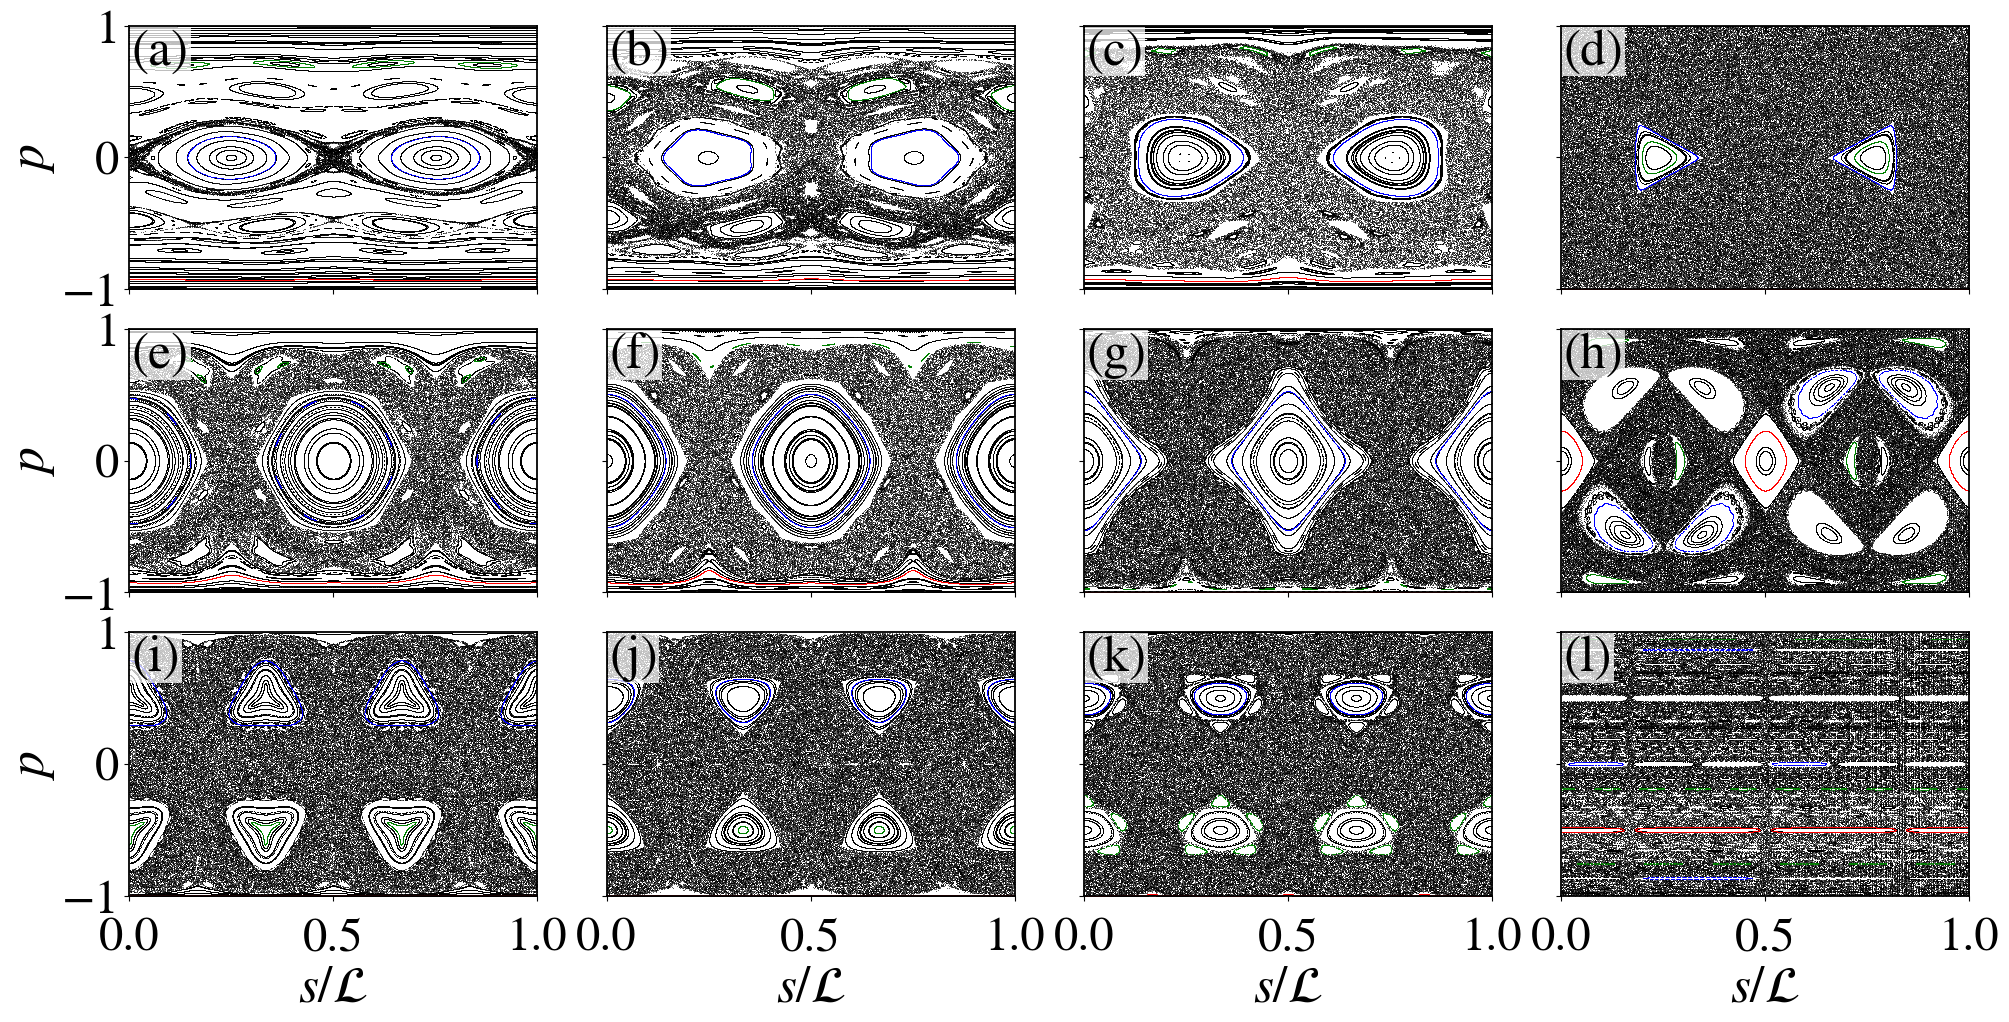

In [27]:
gamma = [1, 2, 3]
eps = [0.4, 0.6, 0.8, 0.9999]
N = int(3e3)
n_ics = 75
CIs = [ [ [[0, np.pi/2 - 0.01], [0, 2.75], [1, np.pi/2], [2.2, np.pi/4]], [[0, np.pi/2 - 0.01], [0, 2.75], [1, np.pi/2], [2.6, 1]], [[0, np.pi/2 - 0.01], [0, 2.75], [1, np.pi/2], [0, 0.62]], [[0, np.pi/2 - 0.01], [0, 3.12], [2.4, np.pi/2], [2.1, np.pi/2]] ], 
       [ [[0, np.pi/4 - 0.01], [0, 2.75], [1, np.pi/2], [2.2, np.pi/4]], [[0, np.pi/4 - 0.01], [0, 2.75], [1, np.pi/2], [0, 0.5175]], [[0, np.pi/4 - 0.01], [0, 3.1], [1, np.pi/2], [0, 2.9]], [[0, np.pi/4 - 0.01], [0, 1.8], [0.69, 2], [0.645, 0.4]] ], 
       [[[0, np.pi/2 - 0.01], [0, 3.1], [1.6, 1], [2, 2.1]], [[0, np.pi/2 - 0.01], [0, 3.1], [1.6, 1], [2, 2.1]], [[0, np.pi/2 - 0.01], [0, 3.11], [1.6, 1], [1.55, 2]], [[0, np.pi/2 - 0.01], [0, 2.115], [1, np.pi/2], [2.25, 1.755]]] ]
colors = ["black", "red", "blue", "green"]
plot_params(fontsize=37, tick_labelsize=35)
xbox = 0.0065
ybox = 0.855
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(20, 10))
np.random.seed(17)
for i, g in enumerate(gamma):
    for j, e in enumerate(eps):
        Lmax = arc_length(g, e)
        theta0 = np.random.rand(n_ics)*2*np.pi
        alpha0 = np.random.rand(n_ics)*np.pi
        for k in range(n_ics):
            ts = phase_space(theta0[k], alpha0[k], g, e, N)
            s = np.zeros(N + 1)
            for l in range(len(ts[:, 0])):
                s[l] = arc_length(g, e, theta_end=ts[l, 0])
            p = np.cos(ts[:, 1])
            ax[i, j].plot(s/Lmax, p, "ko", markersize=0.5, markeredgewidth=0.0)
for i in range(3*4):
    ax[int(i / 4), i % 4].text(xbox, ybox, '(%s)' % ascii_lowercase[i], transform=ax[int(i / 4), i % 4].transAxes, bbox=bbox)
            #ax[i, j].plot(ts[:, 0], ts[:, 1], "ko", markersize=0.5, markeredgewidth=0.0)
for i, g in enumerate(gamma):
    for j, e in enumerate(eps):
        Lmax = arc_length(g, e)
        for k in range(len(CIs[i][j])):
            theta0 = CIs[i][j][k][0]
            alpha0 = CIs[i][j][k][1]
            ts = phase_space(theta0, alpha0, g, e, N)
            s = np.zeros(N + 1)
            for l in range(len(ts[:, 0])):
                s[l] = arc_length(g, e, theta_end=ts[l, 0])
            p = np.cos(ts[:, 1])
            ax[i, j].plot(s/Lmax, p, "o", markersize=0.75, markeredgewidth=0.0, color=colors[k])
            #ax[i, j].plot(ts[:, 0], ts[:, 1], "o", markersize=0.75, markeredgewidth=0.0, color=colors[k])
ax[2, 0].tick_params(axis='x', which='major', pad=12)
ax[2, 1].tick_params(axis='x', which='major', pad=12)
ax[2, 2].tick_params(axis='x', which='major', pad=12)
ax[2, 3].tick_params(axis='x', which='major', pad=12)
ax[0, 0].set_xlim(0, 1)
ax[0, 0].set_ylim(-1, 1)
ax[0, 0].set_xticks([0, 0.5, 1])
ax[0, 0].set_yticks([-1, 0, 1])
ax[0, 0].set_ylabel("$p$")
ax[1, 0].set_ylabel("$p$")
ax[2, 0].set_ylabel("$p$")
ax[2, 0].set_xlabel("$s/\\mathcal{L}$")
ax[2, 1].set_xlabel("$s/\\mathcal{L}$")
ax[2, 2].set_xlabel("$s/\\mathcal{L}$")
ax[2, 3].set_xlabel("$s/\\mathcal{L}$")
plt.subplots_adjust(left=0.06, right=0.98, top=0.98, hspace=0.15, wspace=0.17)
plt.savefig("Figures/billiard_phase_space.png", dpi=300)
#arc_length(gamma, eps)

<Figure size 640x480 with 0 Axes>

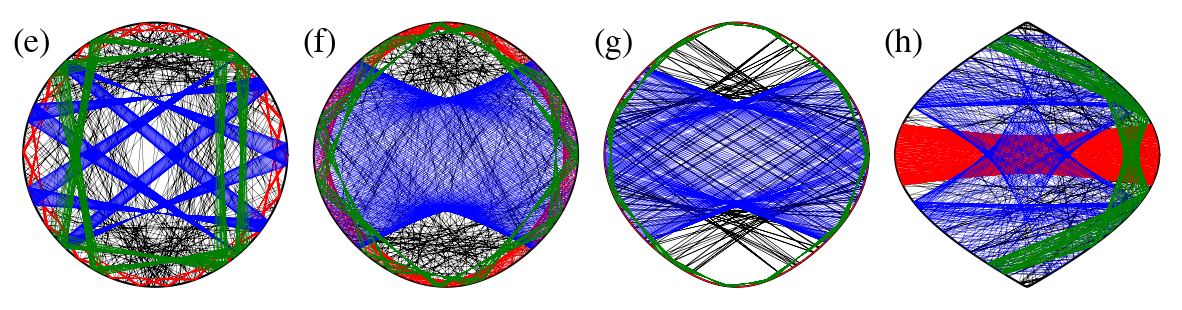

In [26]:
xbox = 0.0065
ybox = 0.855
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
g = 2
labels = ["abcd", "efgh", "ijkl"]
eps = [0.4, 0.6, 0.8, 0.9999]
N = int(2.5e2)
n_ics = 75
CIs = [ [ [[0, np.pi/2 - 0.01], [0, 2.75], [1, np.pi/2], [2.2, np.pi/4]], [[0, np.pi/2 - 0.01], [0, 2.75], [1, np.pi/2], [2.6, 1]], [[0, np.pi/2 - 0.01], [0, 2.75], [1, np.pi/2], [0, 0.62]], [[0, np.pi/2 - 0.01], [0, 3.12], [2.4, np.pi/2], [2.1, np.pi/2]] ], 
       [ [[0, np.pi/4 - 0.01], [0, 2.75], [1, np.pi/2], [2.2, np.pi/4]], [[0, np.pi/4 - 0.01], [0, 2.75], [1, np.pi/2], [0, 0.5175]], [[0, np.pi/4 - 0.01], [0, 3.1], [1, np.pi/2], [0, 2.9]], [[0, np.pi/4 - 0.01], [0, 1.8], [0.69, 2], [0.645, 0.4]] ], 
       [[[0, np.pi/2 - 0.01], [0, 3.1], [1.6, 1], [2, 2.1]], [[0, np.pi/2 - 0.01], [0, 3.1], [1.6, 1], [2, 2.1]], [[0, np.pi/2 - 0.01], [0, 3.11], [1.6, 1], [1.55, 2]], [[0, np.pi/2 - 0.01], [0, 2.115], [1, np.pi/2], [2.25, 1.755]]] ]
colors = ["black", "red", "blue", "green"]
plot_params(fontsize=25)
xbox = 0.0065
ybox = 0.855
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
for j, e in enumerate(eps):
    Lmax = arc_length(g, e)
    radius = R(g, e, theta)
    x = radius*np.cos(theta)
    y = radius*np.sin(theta)
    ax[j].plot(x, y, "k")
    for k in range(len(CIs[g - 1][j])):
        theta0 = CIs[g - 1][j][k][0]
        alpha0 = CIs[g - 1][j][k][1]
        ts = time_series(theta0, alpha0, g, e, N)
        ax[j].plot(ts[:, 0], ts[:, 1], color=colors[k], lw=0.25)
    ax[j].set_box_aspect(1)
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['bottom'].set_visible(False)
    ax[j].spines['left'].set_visible(False)
    ax[j].get_xaxis().set_ticks([])
    ax[j].get_yaxis().set_ticks([])
for i in range(len(labels[g])):
    ax[i].text(xbox, ybox, '(%s)' % labels[g - 1][i], transform=ax[i].transAxes, bbox=bbox)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig("Figures/billiard_confspace_gamma=%i.png" % g, dpi=300, bbox_inches='tight', pad_inches=0)

## Lyapunov exponents

### $\lambda \times \xi$

In [20]:
deps = 0.001
eps = np.arange(0, 0.99999, deps)
N = int(1e8)
exponent = int(np.log10(N))
base = int(N/10**exponent)
path = '/home/matheus/Doutorado/Tese/Dados/'

In [21]:
gamma = 1
theta0 = np.pi
alpha0 = np.pi/2
lypnv = lyapunov(theta0, alpha0, gamma, eps, N)

In [22]:
datafile = path + "billiard_lyapunov_vs_eps_gamma=%i_N=%ie%i_deps=%.4f.dat" % (gamma, base, exponent, deps)
with open(datafile, "w") as df:
    for i in range(len(eps)):
        df.write("%.16f %.16f\n" % (eps[i], lypnv[i]))

In [23]:
gamma = 2
theta0 = np.pi/2
alpha0 = np.pi/2
lypnv2 = lyapunov(theta0, alpha0, gamma, eps, N)

In [24]:
datafile = path + "billiard_lyapunov_vs_eps_gamma=%i_N=%ie%i_deps=%.4f.dat" % (gamma, base, exponent, deps)
with open(datafile, "w") as df:
    for i in range(len(eps)):
        df.write("%.16f %.16f\n" % (eps[i], lypnv2[i]))

In [25]:
gamma = 3
theta0 = np.pi
alpha0 = 1.08
lypnv3 = lyapunov(theta0, alpha0, gamma, eps, N)

In [26]:
datafile = path + "billiard_lyapunov_vs_eps_gamma=%i_N=%ie%i_deps=%.4f.dat" % (gamma, base, exponent, deps)
with open(datafile, "w") as df:
    for i in range(len(eps)):
        df.write("%.16f %.16f\n" % (eps[i], lypnv3[i]))

<Figure size 640x480 with 0 Axes>

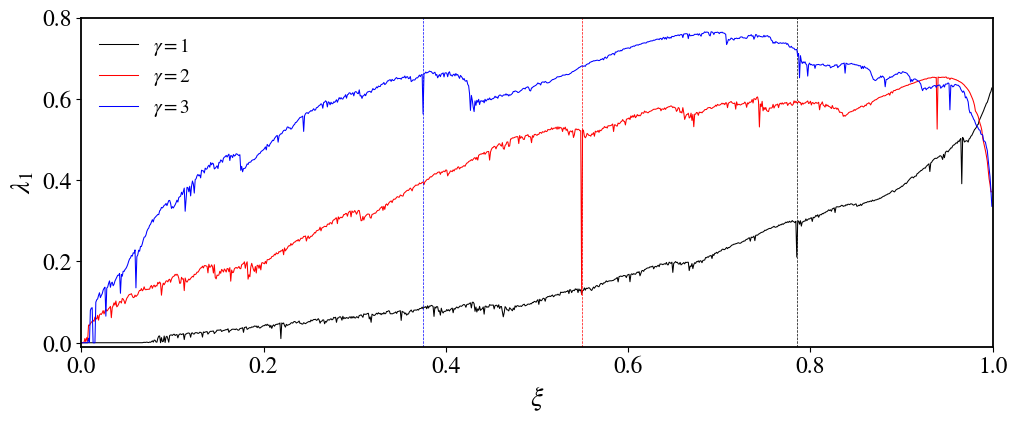

In [23]:
N = int(1e8)
exponent = int(np.log10(N))
base = int(N/10**exponent)
deps = 0.001
path = '/home/matheus/Doutorado/Tese/Dados/'
datafile = path + "billiard_lyapunov_vs_eps_gamma=%i_N=%ie%i_deps=%.4f.dat"
gammas = [1, 2, 3]
epss = [0.785, 0.549, 0.375]
c = ['k', 'r', 'b']
plot_params()
fig, ax = plt.subplots(figsize=(10, 4))
lw = 0.75
path = '/home/matheus/Doutorado/Tese/Dados/'
for i, gamma in enumerate(gammas):
    df = pd.read_csv(datafile % (gamma, base, exponent, deps), header=None, delim_whitespace=True)
    eps = np.array(df[0])
    lypnv = np.array(df[1])
    plt.plot([epss[i], epss[i]], [-0.01, 0.8], "--", color=c[i], lw=lw/1.5)
    plt.plot(eps, lypnv, c[i], lw=lw, label="$\\gamma = %i$" % gamma)
plt.legend(loc='upper left', frameon=False)
plt.xlim(0, 1)
plt.ylim(-0.01, 0.8)
plt.xlabel("$\\xi$")
plt.ylabel("$\\lambda_1$")
plt.subplots_adjust(left=0.071, bottom=0.155, right=0.9825, top=0.978)
plt.savefig("Figures/billiard_lyapunov_vs_eps.png", dpi=500)

In [13]:
gamma = [1, 2, 3]
eps = [0.785, 0.549, 0.375]
N = int(2e6)
exponent = int(np.log10(N))
base = int(N/10**exponent)
theta0 = [np.pi, np.pi/2, np.pi]
alpha0 = [np.pi/2, np.pi/2, 1.08]
path = "/home/matheus/Doutorado/Tese/Dados/"
for i in range(len(gamma)):
    datafile = path + "billiard_phase_space_gamma=%i_eps=%.3f_N=%ie%i.dat" % (gamma[i], eps[i], base, exponent)
    df = open(datafile, "w")
    ps = phase_space(theta0[i], alpha0[i], gamma[i], eps[i], N)
    s = np.zeros(N + 1)
    p = np.cos(ps[:, 1])
    for l in range(len(ps[:, 0])):
        s[l] = arc_length(gamma[i], eps[i], theta_end=ps[l, 0])
        df.write("%.16f %.16f\n" % (s[l], p[l]))

<Figure size 640x480 with 0 Axes>

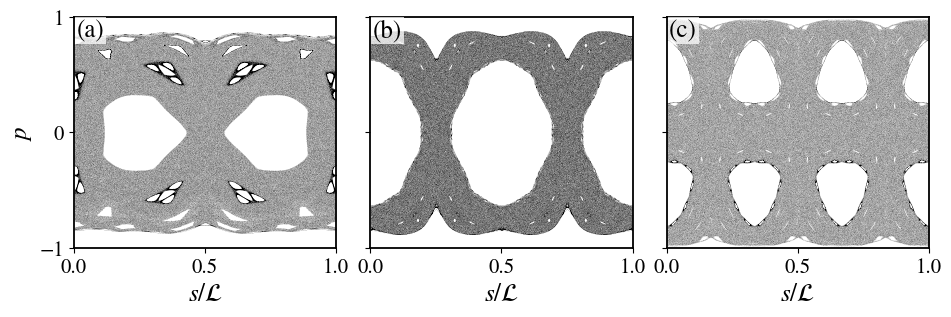

In [16]:
plot_params(fontsize=18, tick_labelsize=15)
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3))
xbox = 0.0097
ybox = 0.9145
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
gamma = [1, 2, 3]
eps = [0.785, 0.549, 0.375]
N = int(2e6)
theta0 = [np.pi, np.pi/2, np.pi]
alpha0 = [np.pi/2, np.pi/2, 1.08]
path = "/home/matheus/Doutorado/Tese/Dados/"
for i in range(len(gamma)):
    datafile = path + "billiard_phase_space_gamma=%i_eps=%.3f_N=%ie%i.dat" % (gamma[i], eps[i], base, exponent)
    Lmax = arc_length(gamma[i], eps[i])
    df = pd.read_csv(datafile, header=None, delim_whitespace=True)
    s = np.array(df[0])
    p = np.array(df[1])
    ax[i].plot(s/Lmax, p, "ko", markersize=0.07, markeredgewidth=0.0)
    ax[i].set_xlabel("$s/\\mathcal{L}$")
    ax[i].text(xbox, ybox, '(%s)' % ascii_lowercase[i], transform=ax[i].transAxes, bbox=bbox)

ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([-1, 0, 1])
plt.xlim(0, 1)
plt.ylim(-1, 1)
ax[0].set_ylabel("$p$")
plt.subplots_adjust(left=0.065, bottom=0.2, right=0.92, top=0.97, wspace=0.13)
plt.savefig("Figures/billiard_phase_space_stick.png", dpi=300)

### Grid

In [24]:
L = 1000
N = int(2e4)
exponent = int(np.log10(N))
base = int(N/10**exponent)
gamma = [1, 2, 3]
eps = [0.665, 0.836, 0.43]
eps = [0.785, 0.549, 0.375]
path = "/home/matheus/Doutorado/Tese/Dados/"
for j in range(len(gamma)):
    datafile = path + "billiard_grid_lyapunov_gamma=%i_eps=%.3f_N=%ie%i_L=%i.dat" % (gamma[j], eps[j], base, exponent, L)
    theta0 = np.linspace(0, 2*np.pi, L, endpoint=True)
    alpha0 = np.linspace(0, np.pi, L, endpoint=True)
    s0 = np.zeros(L)
    p0 = np.cos(alpha0)
    Lmax = arc_length(gamma[j], eps[j])
    for i in range(L):
        s0[i] = arc_length(gamma[j], eps[j], theta_end=theta0[i])
    s0 = s0/Lmax
    s0, p0 = np.meshgrid(s0, p0)
    theta0, alpha0 = np.meshgrid(theta0, alpha0)
    lypnv = lyapunov(theta0, alpha0, gamma[j], eps[j], N)
    lypnv = np.array(lypnv).reshape((L, L))
    with open(datafile, "w") as df:
        for ii in range(L):
            for jj in range(L):
                df.write("%.16f %.16f %.16f\n" % (s0[ii, jj], p0[ii, jj], lypnv[ii, jj]))
            df.write("\n")

<Figure size 640x480 with 0 Axes>

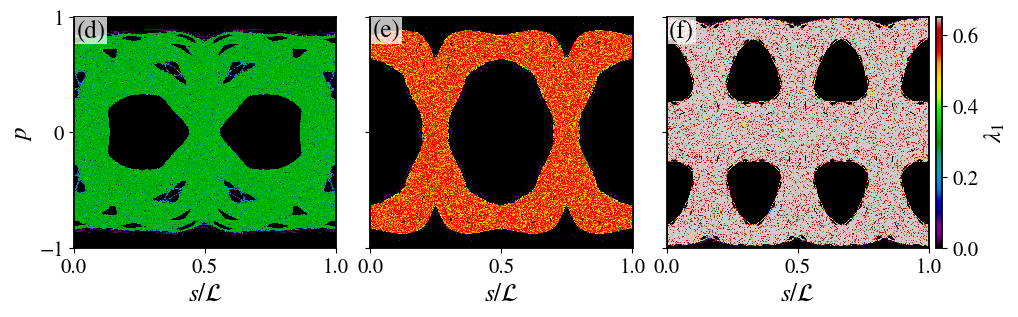

In [20]:
L = 1000
N = int(2e4)
exponent = int(np.log10(N))
base = int(N/10**exponent)
gamma = [1, 2, 3]
eps = [0.665, 0.836, 0.43]
eps = [0.785, 0.549, 0.375]
path = "/home/matheus/Doutorado/Tese/Dados/"
plot_params(fontsize=18, tick_labelsize=15)
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3))
xbox = 0.0097
ybox = 0.9145
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
label = ["(d)", "(e)", "(f)"]
maxl = 0
for j in range(len(gamma)):
    datafile = path + "billiard_grid_lyapunov_gamma=%i_eps=%.3f_N=%ie%i_L=%i.dat" % (gamma[j], eps[j], base, exponent, L)
    df = pd.read_csv(datafile, header=None, delim_whitespace=True)
    z = np.array(df[2])
    if z[np.isfinite(z)].max() > maxl:
        maxl = z[np.isfinite(z)].max()
for j in range(len(gamma)):
    datafile = path + "billiard_grid_lyapunov_gamma=%i_eps=%.3f_N=%ie%i_L=%i.dat" % (gamma[j], eps[j], base, exponent, L)
    df = pd.read_csv(datafile, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    z = np.array(df[2])
    M = int(np.sqrt(len(x)))
    x = x.reshape((M, M))
    y = y.reshape((M, M))
    z = z.reshape((M, M))
    hm = ax[j].pcolor(x, y, z, cmap="nipy_spectral", vmin=0.0, vmax=0.65)
    ax[j].set_xlabel("$s/\\mathcal{L}$")
    ax[j].text(xbox, ybox, label[j], transform=ax[j].transAxes, bbox=bbox)
ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([-1, 0, 1])
ax[0].set_ylabel("$p$")
plt.subplots_adjust(left=0.065, bottom=0.2, right=0.92, top=0.97, wspace=0.13)
cbar_ax = fig.add_axes([0.9275, 0.2, 0.006, 0.97-0.2])
cbar = fig.colorbar(hm, cax=cbar_ax, label='$\\lambda_1$')
plt.savefig("Figures/billiard_grid_lyapunov.png", dpi=300)

## Determinant Jacobian matrix

In [2]:
gamma = 1
eps = 0.665
theta0 = np.pi
alpha0 = np.pi/2
num_coll = int(1e4)
# Initial quantities
Rmax = R(gamma, eps, (np.pi/gamma))
R0 = R(gamma, eps, theta0)
Rl0 = dRdtheta(R0, gamma, eps, theta0)
Rll0 = d2Rdtheta2(Rl0, R0, gamma, eps, theta0)
x0 = R0*np.cos(theta0)
y0 = R0*np.sin(theta0)
xl0 = Rl0*np.cos(theta0) - R0*np.sin(theta0)
yl0 = Rl0*np.sin(theta0) + R0*np.cos(theta0)
xll0 = Rll0*np.cos(theta0) - 2*Rl0*np.sin(theta0) - R0*np.cos(theta0)
yll0 = Rll0*np.sin(theta0) + 2*Rl0*np.cos(theta0) - R0*np.sin(theta0)
phi = np.arctan2(yl0, xl0) % (2*np.pi)
mu = (alpha0 + phi) % (2*np.pi)
beta0 = 0
somaT11 = 0
det1 = np.zeros(num_coll + 1)
det2 = np.zeros(num_coll + 1)
for i in range(num_coll + 1):
    theta1 = collision_point(x0, y0, Rmax, gamma, eps, mu)
    R1 = R(gamma, eps, theta1)
    Rl1 = dRdtheta(R1, gamma, eps, theta1)
    Rll1 = d2Rdtheta2(Rl1, R1, gamma, eps, theta1)
    x1 = R1*np.cos(theta1)
    y1 = R1*np.sin(theta1)
    xl1 = Rl1*np.cos(theta1) - R1*np.sin(theta1)
    yl1 = Rl1*np.sin(theta1) + R1*np.cos(theta1)
    xll1 = Rll1*np.cos(theta1) - 2*Rl1*np.sin(theta1) - R1*np.cos(theta1)
    yll1 = Rll1*np.sin(theta1) + 2*Rl1*np.cos(theta1) - R1*np.sin(theta1)
    phi = np.arctan2(yl1, xl1) % (2*np.pi)
    alpha1 = (phi - mu) % np.pi
    deltax = x1 - x0
    dphidt0 = (xl0*yll0 - xll0*yl0)/(xl0**2 + yl0**2)
    dphidt1 = (xl1*yll1 - xll1*yl1)/(xl1**2 + yl1**2)
    chi = Rl1*(np.sin(theta1) - np.tan(mu)*np.cos(theta1)) + R1*(np.cos(theta1) + np.tan(mu)*np.sin(theta1))
    # Jacobian matrix in terms of (theta, alpha)
    J11 = ((1 + np.tan(mu)**2)*dphidt0*deltax + yl0 - np.tan(mu)*xl0)/chi
    J12 = deltax*(1 + np.tan(mu)**2)/chi
    J21 = dphidt1*J11 - dphidt0
    J22 = dphidt1*J12 - 1
    det1[i] = J11*J22 - J12*J21
    # Jacobian matrix in terms of the Birkhoff coordinates (s, p)
    J11 = np.sqrt((R1**2 + Rl1**2)/(R0**2 + Rl0**2))*J11
    J12 = (-np.sqrt(R1**2 + Rl1**2)/np.sin(alpha0))*J12
    J21 = (-np.sin(alpha1)/np.sqrt(R0**2 + Rl0**2))*J21
    J22 = (np.sin(alpha1)/np.sin(alpha0))*J22
    det2[i] = J11*J22 - J12*J21
    # Update the particle's direction
    mu = (alpha1 + phi) % (2*np.pi)
    theta0 = theta1
    alpha0 = alpha1
    x0 = x1
    y0 = y1
    xl0 = xl1
    yl0 = yl1
    xll0 = xll1
    yll0 = yll1
    R0 = R1
    Rl0 = Rl1
    Rll0 = Rll1

<Figure size 640x480 with 0 Axes>

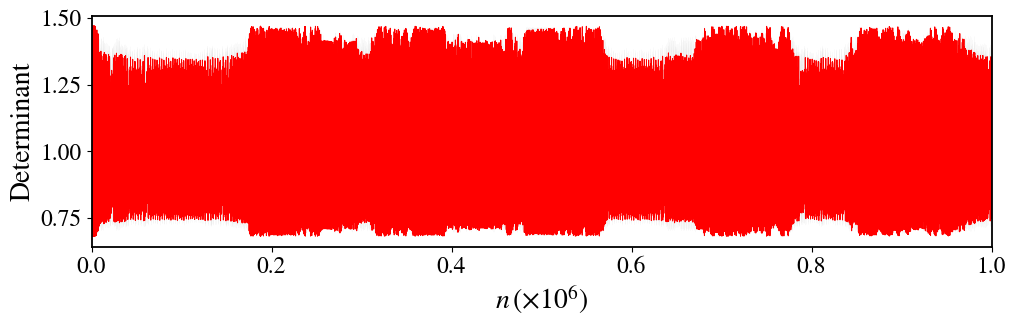

In [3]:
plot_params()
fig, ax = plt.subplots(figsize=(10, 3))
lw = 0.75
n = np.arange(num_coll + 1)/num_coll
plt.plot(n, det1, 'k', lw=lw/60, label="$|J|$")
plt.plot(n, det2, 'r', lw=lw, label="$|j|$")
plt.xlabel("$n\\,(\\times10^6)$")
plt.ylabel("Determinant")
#plt.ylabel("$|J|$, ${|j|}$")
plt.xlim(0, n.max())
plt.subplots_adjust(left=0.085, bottom=0.21, right=0.985, top=0.98)
#plt.savefig("Figures/billiard_detJ.png", dpi=300)

## Dig

In [35]:
L = 1000
N = int(1e4)
exponent = int(np.log10(N))
base = int(N/10**exponent)
gamma = [1, 2, 3]
eps = [0.665, 0.836, 0.43]
path = "/home/matheus/Doutorado/Tese/Dados/"
for j in range(len(gamma)):
    datafile = path + "billiard_grid_dig_gamma=%i_eps=%.3f_N=%ie%i_L=%i.dat" % (gamma[j], eps[j], base, exponent, L)
    theta0 = np.linspace(0, 2*np.pi, L, endpoint=True)
    alpha0 = np.linspace(0, np.pi, L, endpoint=True)
    s0 = np.zeros(L)
    p0 = np.cos(alpha0)
    Lmax = arc_length(gamma[j], eps[j])
    for i in range(L):
        s0[i] = arc_length(gamma[j], eps[j], theta_end=theta0[i])
    s0 = s0/Lmax
    s0, p0 = np.meshgrid(s0, p0)
    theta0, alpha0 = np.meshgrid(theta0, alpha0)
    digN = dig(theta0, alpha0, gamma[j], eps[j], N)
    digN = np.array(digN).reshape((L, L))
    with open(datafile, "w") as df:
        for ii in range(L):
            for jj in range(L):
                df.write("%.16f %.16f %.16f\n" % (s0[ii, jj], p0[ii, jj], digN[ii, jj]))
            df.write("\n")

<Figure size 640x480 with 0 Axes>

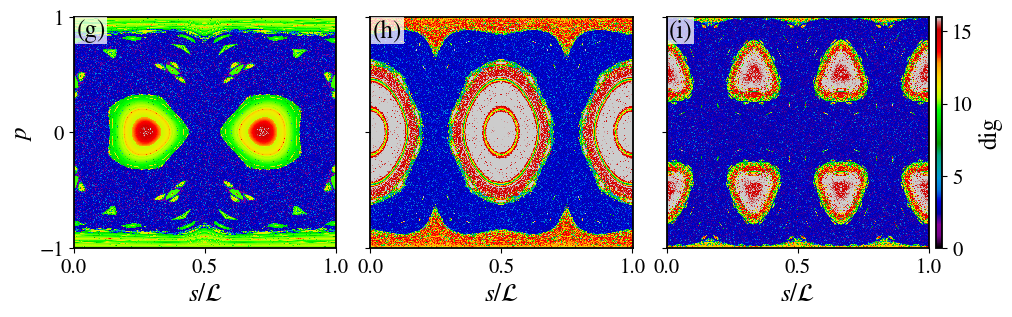

In [4]:
L = 1000
N = int(1e4)
exponent = int(np.log10(N))
base = int(N/10**exponent)
gamma = [1, 2, 3]
eps = [0.665, 0.836, 0.43]
eps = [0.785, 0.549, 0.375]
path = "/home/matheus/Doutorado/Tese/Dados/"
plot_params(fontsize=18, tick_labelsize=15)
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3))
xbox = 0.0097
ybox = 0.9145
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
label = ["(g)", "(h)", "(i)"]
for j in range(len(gamma)):
    datafile = path + "billiard_grid_dig_gamma=%i_eps=%.3f_N=%ie%i_L=%i.dat" % (gamma[j], eps[j], base, exponent, L)
    df = pd.read_csv(datafile, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    z = np.array(df[2])
    M = int(np.sqrt(len(x)))
    x = x.reshape((M, M))
    y = y.reshape((M, M))
    z = z.reshape((M, M))
    hm = ax[j].pcolor(x, y, z, cmap="nipy_spectral", vmin=0.0, vmax=16)
    ax[j].set_xlabel("$s/\\mathcal{L}$")
    ax[j].text(xbox, ybox, label[j], transform=ax[j].transAxes, bbox=bbox)
ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([-1, 0, 1])
ax[0].set_ylabel("$p$")
plt.subplots_adjust(left=0.065, bottom=0.2, right=0.92, top=0.97, wspace=0.13)
cbar_ax = fig.add_axes([0.9275, 0.2, 0.006, 0.97-0.2])
cbar = fig.colorbar(hm, cax=cbar_ax, label='dig')
plt.savefig("Figures/billiard_grid_dig.png", dpi=300)

## RTE

In [2]:
gamma = 3
eps = 0.43
N = 5000
L = 100
theta0 = np.linspace(0, 2*np.pi, L, endpoint=True)
alpha0 = np.linspace(0, np.pi, L, endpoint=True)
theta0, alpha0 = np.meshgrid(theta0, alpha0)
rte = Parallel(n_jobs=-1)(delayed(RTE)(theta0[i, j], alpha0[i, j], gamma, eps, N) for i in range(L) for j in range(L))

<Figure size 640x480 with 0 Axes>

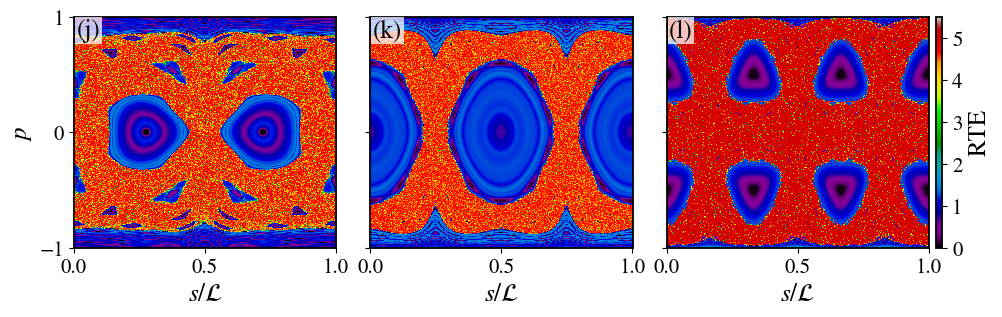

In [3]:
L = 1000
N = int(5e3)
exponent = int(np.log10(N))
base = int(N/10**exponent)
gamma = [1, 2, 3]
eps = [0.785, 0.549, 0.375]
path = "/home/matheus/Doutorado/Tese/Dados/"
plot_params(fontsize=18, tick_labelsize=15)
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3))
xbox = 0.0097
ybox = 0.9145
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
label = ["(j)", "(k)", "(l)"]
for j in range(len(gamma)):
    datafile = path + "billiard_grid_rte_gamma=%i_eps=%.3f_N=%ie%i_L=%i.dat" % (gamma[j], eps[j], base, exponent, L)
    df = pd.read_csv(datafile, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    z = np.array(df[2])
    M = int(np.sqrt(len(x)))
    x = x.reshape((M, M))
    y = y.reshape((M, M))
    z = z.reshape((M, M))
    hm = ax[j].pcolor(x, y, z, cmap="nipy_spectral", vmin=0.0, vmax=5.5)
    ax[j].set_xlabel("$s/\\mathcal{L}$")
    ax[j].text(xbox, ybox, label[j], transform=ax[j].transAxes, bbox=bbox)
ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([-1, 0, 1])
ax[0].set_ylabel("$p$")
plt.subplots_adjust(left=0.065, bottom=0.2, right=0.92, top=0.97, wspace=0.13)
cbar_ax = fig.add_axes([0.9275, 0.2, 0.006, 0.97-0.2])
cbar = fig.colorbar(hm, cax=cbar_ax, label='RTE', ticks=[0, 1, 2, 3, 4, 5])
plt.savefig("Figures/billiard_grid_rte.png", dpi=300)